# Testing Script

Test whether the various ML interpretability methods within MintPy are functioning correctly. 

In [1]:
import sys, os 
path = os.path.dirname(os.getcwd())
sys.path.append(path)

In [2]:
import mintpy
import plotting_config
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

### Generate a toy dataset for testing 

In [3]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')

cols = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 
        'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)',
        'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       ]

df_examples = df[cols]
target = df['Biopsy']

clf = RandomForestClassifier(n_estimators=200, min_samples_leaf=3)

imp = SimpleImputer(missing_values='?', strategy='most_frequent')
X = imp.fit_transform(df_examples, target).astype(float)

df = pd.DataFrame(X, columns=cols)

clf.fit(df,target)

df['Num of pregnancies'].max()

11.0

Using 1 processors...


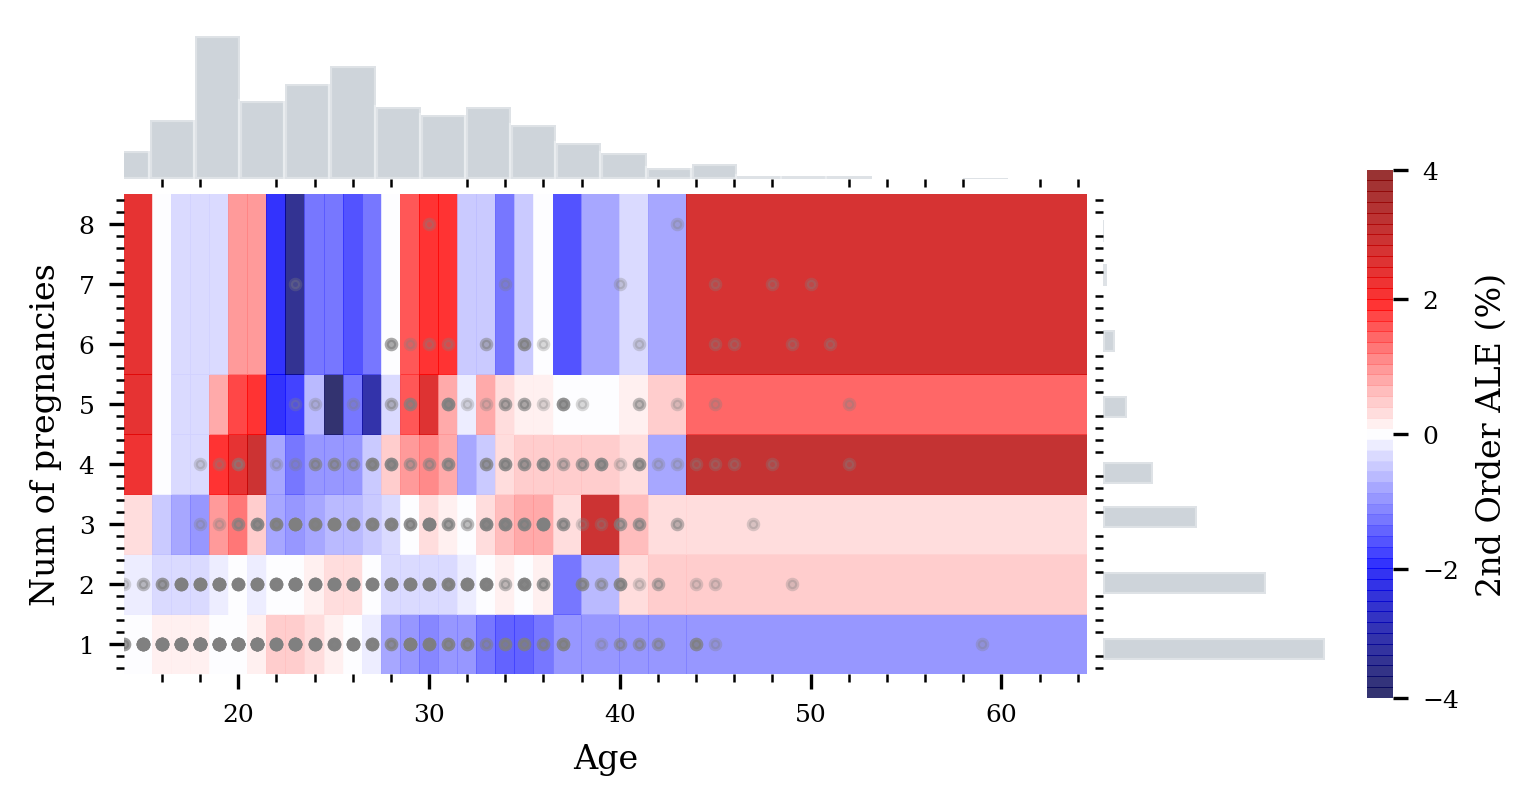

In [4]:
myInterpreter = mintpy.InterpretToolkit(model=[clf],
                                 model_names=['Random Forest'],
                                 examples=df,
                                 targets=target,
                                )

results = myInterpreter.calc_ale(features=[('Age','Num of pregnancies')] , 
                                 nbootstrap=1, 
                                 subsample=1.0,
                                 njobs=1,
                                 nbins=50
                                )

fig, axes = myInterpreter.plot_ale(feature_units=plotting_config.feature_units,
                                   readable_feature_names=plotting_config.readable_feature_names
                                  )